In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
import sklearn
from scipy import stats
from statistics import mean
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import random

In [190]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [191]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [192]:
column_names = df.columns

# null values for each column
null_values = df.isnull().sum()

for column, null_count in zip(column_names, null_values):
    print(f'Column: {column}, Null values: {null_count}')

Column: HeartDiseaseorAttack, Null values: 0
Column: HighBP, Null values: 0
Column: HighChol, Null values: 0
Column: CholCheck, Null values: 0
Column: BMI, Null values: 0
Column: Smoker, Null values: 0
Column: Stroke, Null values: 0
Column: Diabetes, Null values: 0
Column: PhysActivity, Null values: 0
Column: Fruits, Null values: 0
Column: Veggies, Null values: 0
Column: HvyAlcoholConsump, Null values: 0
Column: AnyHealthcare, Null values: 0
Column: NoDocbcCost, Null values: 0
Column: GenHlth, Null values: 0
Column: MentHlth, Null values: 0
Column: PhysHlth, Null values: 0
Column: DiffWalk, Null values: 0
Column: Sex, Null values: 0
Column: Age, Null values: 0
Column: Education, Null values: 0
Column: Income, Null values: 0


In [193]:
mean = df['MentHlth'].mean()
median = df['MentHlth'].median()
print(f'Mean: {mean}, Median: {median}')

Mean: 3.1847721538946705, Median: 0.0


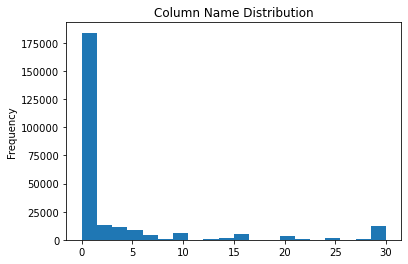

In [194]:
df['MentHlth'].plot(kind='hist', bins=20, range=[0, 30], title='Column Name Distribution')
plt.show()

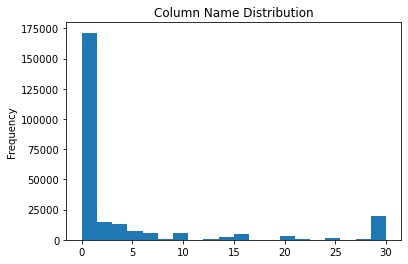

In [195]:
df['PhysHlth'].plot(kind='hist', bins=20, range=[0, 30], title='Column Name Distribution')
plt.show()

In [196]:
#stroke vs mentalHealth
#stroke vs NoDocbcCost
#stroke vs Healthy habits

In [197]:
part1 = df.loc[df["Stroke"] == 0].reset_index(drop=True)
part2 = df.loc[df["Stroke"] == 1].reset_index(drop=True)

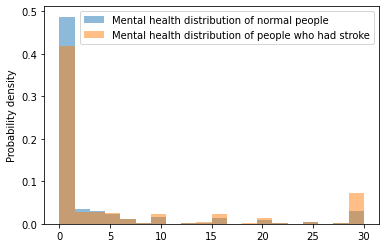

In [198]:
#stroke vs mentalHealth
import matplotlib.pyplot as plt

plt.hist(part1["MentHlth"], bins=20, density=True, alpha=0.5)
plt.hist(part2["MentHlth"], bins=20, density=True, alpha=0.5)

plt.legend(["Mental health distribution of normal people", "Mental health distribution of people who had stroke"])

plt.ylabel("Probability density")

plt.show()


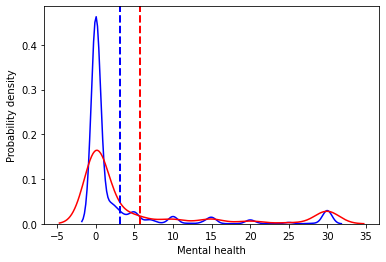

In [199]:
sns.kdeplot(part1["MentHlth"], color='b', label='Part 1')
sns.kdeplot(part2["MentHlth"], color='r', label='Part 2')

plt.axvline(part1["MentHlth"].mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(part2["MentHlth"].mean(), color='r', linestyle='dashed', linewidth=2)

plt.xlabel('Mental health')
plt.ylabel('Probability density')
plt.show()


In [200]:
variance1 = statistics.variance(part1["MentHlth"])
variance2 = statistics.variance(part2["MentHlth"])
print(variance1,variance2)

52.75805031252167 100.13333623880862


In [201]:
#stroke vs mentalHealth
from scipy.stats import ttest_ind

t, p = ttest_ind(part1["MentHlth"], part2["MentHlth"], equal_var=False)

print(f"t-test statistic: {t:.9f}")
print(p)

t-test statistic: -26.436823661
2.85116793201112e-149


In [202]:
# Here Null Hypothesis is “People with mental health issues in past 30 days are not highly prone to stroke”
# Alternate Hypothesis: "People with mental health issues in past 30 days are highly prone to stroke"
# Here clearly p < 𝛼. So, result is statistically significant and we reject our null hypothesis. So, we conclude stating that “People with mental health issues in past 30 days are highly prone to stroke”

In [203]:
part3 = df.loc[df["NoDocbcCost"] == 0].reset_index(drop=True)
part4 = df.loc[df["NoDocbcCost"] == 1].reset_index(drop=True)

In [204]:
count = part3["Stroke"].count()
print(count)
mask = part3["Stroke"].eq(0)
count1 = mask.sum()
print(count1)

232326
223384


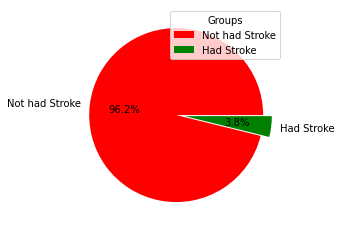

In [205]:
mask = part3["Stroke"].eq(0)
count1 = mask.sum()
mask1 = part3["Stroke"].eq(1)
count2 = mask1.sum()
values = [count1,count2]
labels = ['Not had Stroke', 'Had Stroke']
colors = ['red', 'green']

plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, explode=[0, 0.1])
plt.legend(title='Groups')
plt.show()

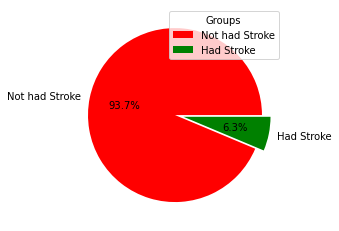

In [206]:
mask = part4["Stroke"].eq(0)
count1 = mask.sum()
mask1 = part4["Stroke"].eq(1)
count2 = mask1.sum()
values = [count1,count2]
labels = ['Not had Stroke', 'Had Stroke']
colors = ['red', 'green']

plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, explode=[0, 0.1])
plt.legend(title='Groups')
plt.show()

In [207]:
#stroke vs NoDocbcCost
t, p = kstest(part3["Stroke"], part4["Stroke"])
print(f"t-test statistic: {t:.9f}")
print(p)

t-test statistic: 0.024730986
8.007397296410068e-11


In [208]:
chisqt = pd.crosstab(df.Stroke, df.NoDocbcCost, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(307.289132958584, 1.8750489229257827e-67, 2)


In [209]:
if chi2_contingency(value)[1] < 0.05:
    print('The people who had to see a doctor in the past 12 months but could not because of the cost are highly prone to strokes')
else:
    print('The people who had to see a doctor in the past 12 months but could not because of the cost are not highly prone to strokes')

The people who had to see a doctor in the past 12 months but could not because of the cost are highly prone to strokes


In [210]:
#stroke vs NoDocbcCost
t, p = kstest(part1["NoDocbcCost"], part2["NoDocbcCost"])
print(f"t-test statistic: {t:.9f}")
print(p)

t-test statistic: 0.048980086
5.023453503790034e-21


In [211]:
mask = (df['CholCheck'] == 1) & (df['PhysActivity'] == 1) & (df['Fruits'] == 1) & (df['Veggies'] == 1)
df['Healthy'] = np.where(mask, 1, 0)

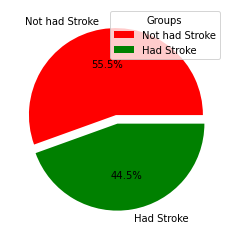

In [212]:
mask = df['Healthy'].eq(0)
count1 = mask.sum()
mask1 = df['Healthy'].eq(1)
count2 = mask1.sum()
values = [count1,count2]
labels = ['Not had Stroke', 'Had Stroke']
colors = ['red', 'green']

plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, explode=[0, 0.1])
plt.legend(title='Groups')
plt.show()

In [213]:
part5 = df.loc[df["Healthy"] == 0].reset_index(drop=True)
part6 = df.loc[df["Healthy"] == 1].reset_index(drop=True)

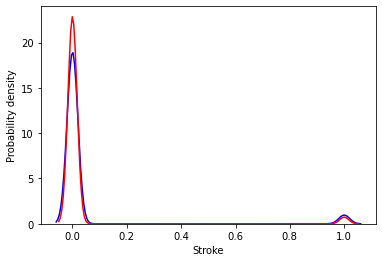

In [214]:
sns.kdeplot(part5["Stroke"], color='b', label='Part 5')
sns.kdeplot(part6["Stroke"], color='r', label='Part 6')

plt.xlabel('Stroke')
plt.ylabel('Probability density')
plt.show()


In [215]:
#stroke vs Healthy
t, p = kstest(part5["Stroke"], part6["Stroke"])
print(f"t-test statistic: {t:.9f}")
print(p)

t-test statistic: 0.017393104
6.794457303964631e-17


In [216]:
chisqt = pd.crosstab(df.Stroke, df.Healthy, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

(486.92567342487973, 1.8426101845137378e-106, 2)


In [217]:
if chi2_contingency(value)[1] < 0.05:
    print('The people with healthy life style considering given parameters like eating veggies, fruits, physical activiity and chol check are not more prone to strokes')
    #The people with healthy life style considering given parameters like eating veggies, fruits, physical activiity and chol check are less prone to strokes
else:
    print('The people with healthy life style considering given parameters like eating veggies, fruits, physical activiity and chol check are more prone to strokes')

The people with healthy life style considering given parameters like eating veggies, fruits, physical activiity and chol check are not more prone to strokes


In [244]:
seed = random.seed(14628513)

In [219]:
correlation_matrix=df.corr()
correlation_matrix.iloc[15,:]

HeartDiseaseorAttack    0.064621
HighBP                  0.056456
HighChol                0.062069
CholCheck              -0.008366
BMI                     0.085310
Smoker                  0.092196
Stroke                  0.070172
Diabetes                0.073507
PhysActivity           -0.125587
Fruits                 -0.068217
Veggies                -0.058884
HvyAlcoholConsump       0.024716
AnyHealthcare          -0.052707
NoDocbcCost             0.192107
GenHlth                 0.301674
MentHlth                1.000000
PhysHlth                0.353619
DiffWalk                0.233688
Sex                    -0.080705
Age                    -0.092068
Education              -0.101830
Income                 -0.209806
Healthy                -0.099730
Name: MentHlth, dtype: float64

In [234]:
x = df[["DiffWalk", "PhysHlth", "GenHlth", "NoDocbcCost"]]
x.head()
y = df["MentHlth"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14628513)
model = LinearRegression()
model.fit(x, y)
predictions = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(rmse)
r_squared = model.score(x, y)
print(r_squared)

6.770221659168112
0.1610611046820506


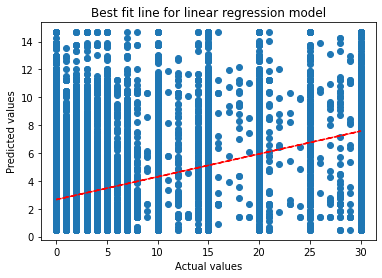

In [235]:
plt.scatter(y_test, predictions)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Best fit line for linear regression model")
plt.show()

In [226]:
model = linear_model.Ridge()
param_grid = {'alpha': (np.logspace(-8, 8, 500))}

# Use GridSearchCV to find the best combination of hyperparameters
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)

{'alpha': 21.412201548157228}


In [238]:
model = linear_model.Ridge(alpha=21.412201548157228)
model.fit(x, y)
predictions = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(rmse)
r_squared = model.score(x, y)
print(r_squared)

6.770209977830018
0.16106108398310226


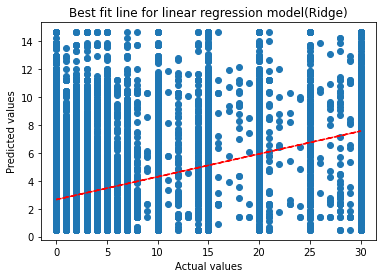

In [239]:
plt.scatter(y_test, predictions)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Best fit line for linear regression model(Ridge)")
plt.show()

In [228]:
model = linear_model.Lasso()
param_grid = {'alpha': (np.logspace(-8, 8, 500))}

# Use GridSearchCV to find the best combination of hyperparameters
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)

{'alpha': 1e-08}


In [240]:
model = linear_model.Lasso(alpha=1e-08)
model.fit(x, y)
predictions = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(rmse)
r_squared = model.score(x, y)
print(r_squared)

6.7702216590220115
0.16106110468205048


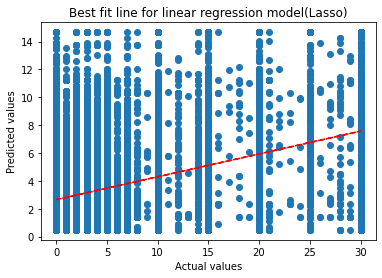

In [241]:
plt.scatter(y_test, predictions)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Best fit line for linear regression model(Lasso)")
plt.show()